# Sudoku solver
## design a sudoku solver to solve sudoku in the for of numpy tensor

### sudoku input = numpy shape (3,3,3,3)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as time



# Generate sudoku

In [36]:
def generate_sudoku(mask_rate=0.5):
    while True:
        n = 9
        m = np.zeros((n, n), np.int)
        rg = np.arange(1, n + 1)
        m[0, :] = np.random.choice(rg, n, replace=False)
        try:
            for r in range(1, n):
                for c in range(n):
                    col_rest = np.setdiff1d(rg, m[:r, c])
                    row_rest = np.setdiff1d(rg, m[r, :c])
                    avb1 = np.intersect1d(col_rest, row_rest)
                    sub_r, sub_c = r//3, c//3
                    avb2 = np.setdiff1d(np.arange(0, n+1), m[sub_r*3:(sub_r+1)*3, sub_c*3:(sub_c+1)*3].ravel())
                    avb = np.intersect1d(avb1, avb2)
                    m[r, c] = np.random.choice(avb, size=1)
            break
        except ValueError:
            pass
    print("Answer:\n", m)
    mm = m.copy()
    mm[np.random.choice([True, False], size=m.shape, p=[mask_rate, 1 - mask_rate])] = 0
    print("\nMasked anwser:\n", mm)
    np.savetxt("./puzzle.csv", mm, "%d", delimiter=",")
    return mm

new_sudoku=generate_sudoku(0.3)

Answer:
 [[2 3 8 1 7 6 9 5 4]
 [5 7 4 2 9 3 1 6 8]
 [9 1 6 4 5 8 2 7 3]
 [1 2 5 3 8 4 7 9 6]
 [4 9 7 6 2 5 3 8 1]
 [6 8 3 9 1 7 4 2 5]
 [8 5 9 7 3 1 6 4 2]
 [7 4 1 5 6 2 8 3 9]
 [3 6 2 8 4 9 5 1 7]]

Masked anwser:
 [[2 0 8 1 7 6 0 5 0]
 [5 0 4 0 9 3 0 6 8]
 [9 1 6 0 5 8 2 7 3]
 [1 2 0 3 8 4 7 9 6]
 [0 0 0 6 2 0 3 8 0]
 [6 0 3 9 1 7 0 0 5]
 [8 5 9 0 3 1 6 0 2]
 [0 4 1 0 0 2 0 3 9]
 [3 0 2 0 4 9 5 0 7]]


## Reshaped into the required format

In [37]:
# framework=np.random.randint(0,10,[3,3,3,3])
def create_framework(new_sudoku):
    return np.swapaxes(np.swapaxes(new_sudoku.reshape([3,3,3,3]),0,2),1,2)
framework=create_framework(new_sudoku)
#framework=np.arange(27*3,dtype=int).reshape([3,3,3,3])

#framework

## list possiblities for verticle rows

In [38]:
def list_possibilities(framework):
    possiblelist=[]
    for i in range(1,10):
        if (i not in framework.flatten()):
            possiblelist.append(i)
    return possiblelist

def list_verticle_framework(framework):
    verticleposs=[]
    for i in range(3):
        for j in range(3):
            verticleposs.append(list_possibilities(framework[i,:,:,j]))
    return verticleposs

v_poss=list_verticle_framework(framework)

#print(v_poss)

## list possibilties for horizontal rows

In [39]:
#framework[0,0,:,:]

def list_horizontal_framework(framework):
    horizontalposs=[]
    for i in range(3):
        for j in range(3):
            #print (framework[:,i,j,:])
            horizontalposs.append(list_possibilities(framework[:,i,j,:]))
    return horizontalposs

h_poss=list_horizontal_framework(framework)

## list possibilities within the array

In [40]:
def list_box_framework(framework):
    boxposs=[]
    for i in range(3):
        for j in range(3):
            #print (framework[i,j,:,:])
            boxposs.append(list_possibilities(framework[i,j,:,:]))
    return boxposs

b_poss=list_box_framework(framework)

## find positional constant of each element

In [41]:
def generate_positional_array(framework):
    framework_with_positional_element=np.zeros([3,3,3,3,4],dtype=int)
    for indexi,i in enumerate(framework):
        for indexj,j in enumerate(i):
            for indexk,k in enumerate(j):
                for indexl,l in enumerate(k):
                    #print(l,f'vrow is {3*indexi+indexl} hrow is {3*indexj+indexk} box is {3*indexi+indexj}')
                    framework_with_positional_element[indexi,indexj,indexk,indexl]=[l,3*indexi+indexl,3*indexj+indexk,3*indexi+indexj]
    return framework_with_positional_element
        
        
        
        

framework_with_positional_element = generate_positional_array(framework)

In [42]:
def solve(f,framework,tries):
    count =0
    t0=time.now()
    remaining = 0
    while True:
        for ii,i in enumerate(f):
            for ij,j in enumerate(i):
                for ik,k in enumerate(j):
                    for il,l in enumerate(k):
                        #print(l)
                        if l[0]==0:
                            remaining_possibilities=np.intersect1d(np.intersect1d(v_poss[l[1]],h_poss[l[2]]),b_poss[l[3]])
                            print(remaining_possibilities)
                            if len(remaining_possibilities)==1:
                                print (f'replace index {ii}{ij}{ik}{il} with {remaining_possibilities[0]}')
                                framework[ii,ij,ik,il]=remaining_possibilities[0]
                                f[ii,ij,ik,il,0]=remaining_possibilities[0]
                            elif (len(remaining_possibilities)==0):
                                print('sudoku is not possible')
                                count=tries
                            else:
                                remaining +=1
        count +=1
        if remaining==0:break
        if count>tries:break
    print(f'sudoku complete time taken is {(time.now()-t0).total_seconds()*1000} ms') if remaining ==0 else print (f'sudoku is still not completed after {(time.now()-t0).total_seconds()*1000} ms')
                            

solve(framework_with_positional_element,framework,10)

[3]
replace index 0001 with 3
[7]
replace index 0011 with 7
[5]
replace index 0102 with 5
[4 7]
[7 9]
[5 7]
[8]
replace index 0121 with 8
[7]
replace index 0210 with 7
[6]
replace index 0221 with 6
[2]
replace index 1010 with 2
[4]
replace index 1020 with 4
[5]
replace index 1112 with 5
[7]
replace index 1200 with 7
[5 7 8]
[6]
replace index 1211 with 6
[8]
replace index 1220 with 8
[4 9]
[4]
replace index 2002 with 4
[1]
replace index 2010 with 1
[1 4]
[4]
replace index 2120 with 4
[2 4]
[4]
replace index 2201 with 4
[8]
replace index 2210 with 8
[1]
replace index 2221 with 1
[4 7]
[7 9]
[5 7]
[5 7 8]
[4 9]
[1 4]
[2 4]
[4 7]
[7 9]
[5 7]
[5 7 8]
[4 9]
[1 4]
[2 4]
[4 7]
[7 9]
[5 7]
[5 7 8]
[4 9]
[1 4]
[2 4]
[4 7]
[7 9]
[5 7]
[5 7 8]
[4 9]
[1 4]
[2 4]
[4 7]
[7 9]
[5 7]
[5 7 8]
[4 9]
[1 4]
[2 4]
[4 7]
[7 9]
[5 7]
[5 7 8]
[4 9]
[1 4]
[2 4]
[4 7]
[7 9]
[5 7]
[5 7 8]
[4 9]
[1 4]
[2 4]
[4 7]
[7 9]
[5 7]
[5 7 8]
[4 9]
[1 4]
[2 4]
[4 7]
[7 9]
[5 7]
[5 7 8]
[4 9]
[1 4]
[2 4]
[4 7]
[7 9]
[5 7]
[5

In [29]:
#framework
print(framework_with_positional_element)

[[[[[8 0 0 0]
    [0 1 0 0]
    [0 2 0 0]]

   [[0 0 1 0]
    [0 1 1 0]
    [7 2 1 0]]

   [[3 0 2 0]
    [1 1 2 0]
    [0 2 2 0]]]


  [[[6 0 3 1]
    [0 1 3 1]
    [5 2 3 1]]

   [[0 0 4 1]
    [0 1 4 1]
    [0 2 4 1]]

   [[0 0 5 1]
    [0 1 5 1]
    [0 2 5 1]]]


  [[[0 0 6 2]
    [5 1 6 2]
    [1 2 6 2]]

   [[9 0 7 2]
    [0 1 7 2]
    [3 2 7 2]]

   [[0 0 8 2]
    [0 1 8 2]
    [6 2 8 2]]]]



 [[[[0 3 0 3]
    [5 4 0 3]
    [0 5 0 3]]

   [[0 3 1 3]
    [0 4 1 3]
    [8 5 1 3]]

   [[6 3 2 3]
    [0 4 2 3]
    [0 5 2 3]]]


  [[[0 3 3 4]
    [0 4 3 4]
    [2 5 3 4]]

   [[5 3 4 4]
    [6 4 4 4]
    [0 5 4 4]]

   [[0 3 5 4]
    [0 4 5 4]
    [0 5 5 4]]]


  [[[0 3 6 5]
    [2 4 6 5]
    [6 5 6 5]]

   [[0 3 7 5]
    [1 4 7 5]
    [0 5 7 5]]

   [[9 3 8 5]
    [0 4 8 5]
    [0 5 8 5]]]]



 [[[[0 6 0 6]
    [0 7 0 6]
    [0 8 0 6]]

   [[1 6 1 6]
    [9 7 1 6]
    [0 8 1 6]]

   [[0 6 2 6]
    [0 7 2 6]
    [5 8 2 6]]]


  [[[0 6 3 7]
    [0 7 3 7]
    [0 8 3 7]]

   [[2 6 4 7]


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
def plot(framework):
    df=[]
    for i in framework:
        for j in i:
            df.append(pd.DataFrame(j))

    fig,axn = plt.subplots(3, 3, sharex=True, sharey=True)

    for ax,dfi in zip(np.swapaxes(axn,0,1).flat,df):
        sns.heatmap(dfi,annot=True, ax=ax, cbar=False, cmap='Greys')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

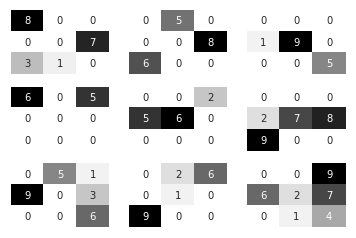

In [31]:
plot(framework)

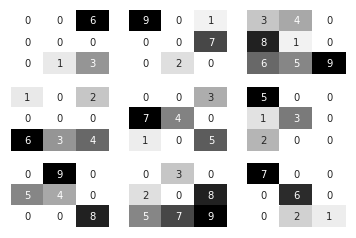

In [32]:
plot(np.load('puzzle.npy'))

In [33]:
plot(np.load('solved.npy'))

ValueError: DataFrame constructor not properly called!